<a href="https://colab.research.google.com/github/baku-ais/Bayesian_Optimization_sample/blob/master/%E3%83%99%E3%82%A4%E3%82%BA%E6%9C%80%E9%81%A9%E5%8C%96%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ベイズ最適化のサンプルコード

ガウス過程の計算はGPyを利用

ベイズ最適化の計算はGPyOptを利用

In [0]:
# 必要なライブラリをインストール
!pip install GPy
!pip install GPyOpt

In [0]:
import GPy          # ガウス過程の計算に必要なライブラリ
import GPyOpt       # ベイズ最適化の計算に必要なライブラリ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

最適化する関数：

$f(x)=-\frac{1}{6}x^6+\frac{3}{5}x^5+x^4-4x^3-cos(3x)+2sin(5x)$

In [0]:
# 最適化する関数
def func(x):
  return - 1/6.0 * x**6 + 3 / 5.0 * x**5 + x**4 - 4 * x**3 - np.cos(3 * x) + 2 * np.sin(5 * x)

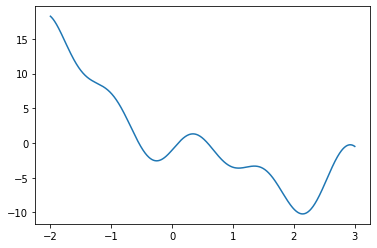

In [0]:
x = np.linspace(-2, 3, 1000)
y = func(x)
plt.plot(x, y)

In [0]:
# GPyOptの初期化

# 変数の探索範囲を指定
bounds = [{'name': 'x',               # 変数名
      'type': 'continuous',           # 変数の種類（連続，離散）
     'domain': (-2, 3)}]             # 探索範囲を指定

# ベイズ最適化の初期化
bo = GPyOpt.methods.BayesianOptimization(
    f = func,                   # 最適化する関数
    domain=bounds,                 # 探索範囲を指定
    initial_design_numdata=1,            # 初期値として与えるサンプルの数
    acquisition_type='EI',             # 獲得関数を指定
    maximize=False,                 # 関数を最大化か・最小化するかを指定
    normalize_Y=False)               # Yを正規化するかどうかを指定

# 図の見方について

緑線：最適化する関数

青線：ガウス過程により推定された平均値

青枠：ガウス過程により推定された分散

赤線：獲得関数

x：サンプル

---
次のステップでサンプリングする場所：
獲得関数の値が最大の場所

獲得関数EIの場合：現在の最大値との差の期待値が最も大きい場所

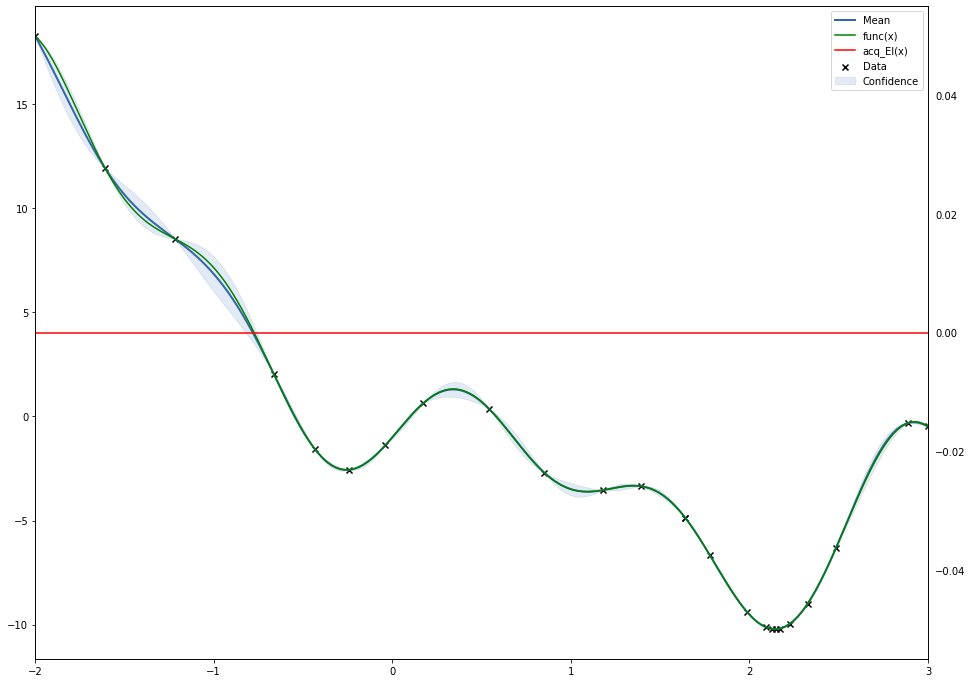

In [0]:
# このセルをctrl-Enterで1回ずつサンプリングする

# サンプリングする, max_iterでサンプリングの回数を指定
bo.run_optimization(max_iter=1, eps=0)

# グラフを描画するための設定
model = bo.model.model
x_min, x_max = bo.space.get_bounds()[0]   # 変数の探索範囲の上下限を獲得

x = np.linspace(x_min, x_max, 1000)
y = func(x)   # 最適化する関数の真値
acq = -bo.acquisition.acquisition_function(x[:,None]).flatten()   # 獲得関数の値

fig, ax = plt.subplots(figsize=(16,12))
ax_sub = ax.twinx()
ax_sub.tick_params(labelright="off", right="off", width=0)
ax_sub.grid(False)

model.plot(plot_limits=(x_min, x_max), ax=ax)   # ガウス過程を描画(青い線・青い枠・記号x)
ax.plot(x, y, "g", label="func(x)")
ax_sub.plot(x, acq, "r")
ax.plot([],[],"r", label="acq_EI(x)")
ax.legend()